## Prepare input data

This notebook helps you load the experimental data from an excel file or a csv file, and plot it

Then you can use the next part to generate a config file for the bayesian inference 

In [1]:
# load the relevant modules for the analysis

import os
from pathlib import Path

from pl_temp_fit import Exp_data_utils, config_utils

# access the right directory
# os.chdir('/home/mohammed/Work/pl_temp_fit/')

os.chdir("/media/mohammed/Work/pl_temp_fit/")

In [2]:
exp_dataset_path = Path(
    "/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv"
)

In [3]:
# Process the input data
# if the data are in xlsx format convert them to csv

xlsx_files = list(exp_dataset_path.glob("*.xlsx"))
for xlsx_file in xlsx_files:
    xlsx_file = xlsx_file.absolute().as_posix()
    csv_name = Exp_data_utils.from_xslx_to_csv(xlsx_file)
    print(csv_name)

In [10]:
# Read the experimental data available
csv_files = list(exp_dataset_path.glob("*.csv"))
string_to_find = "ITIC"
for id, csv_file in enumerate(csv_files):
    if string_to_find in str(csv_file):
        print(id, csv_file)

1 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv
2 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-soln_mod_split0_split500.csv
3 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITICDIO-300K-9_G0_650.0nm_1450.0nm_12-07-2024-12h-49m_Exposure_2.0s_mod_split0_split500_mod_split0_split500.csv
19 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITICDIO-300K-9_G0_650.0nm_1450.0nm_12-07-2024-12h-49m_Exposure_2.0s_mod_split0_split500.csv


/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv


'/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv'

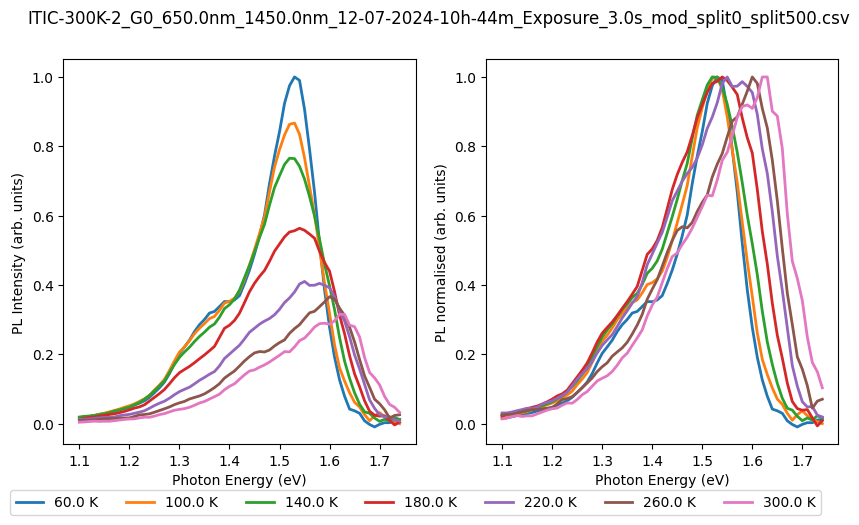

In [16]:
# choose the data to be analysed
# and plot them

csv_name = csv_files[1]
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
fig, ax = Exp_data_utils.plot_pl_data(
    Exp_data, temperature_list, hws, title=csv_name.name.split("/")[-1]
)
csv_name.absolute().as_posix()

[ 60. 100. 140. 180. 220. 260. 300.]
/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv
/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv


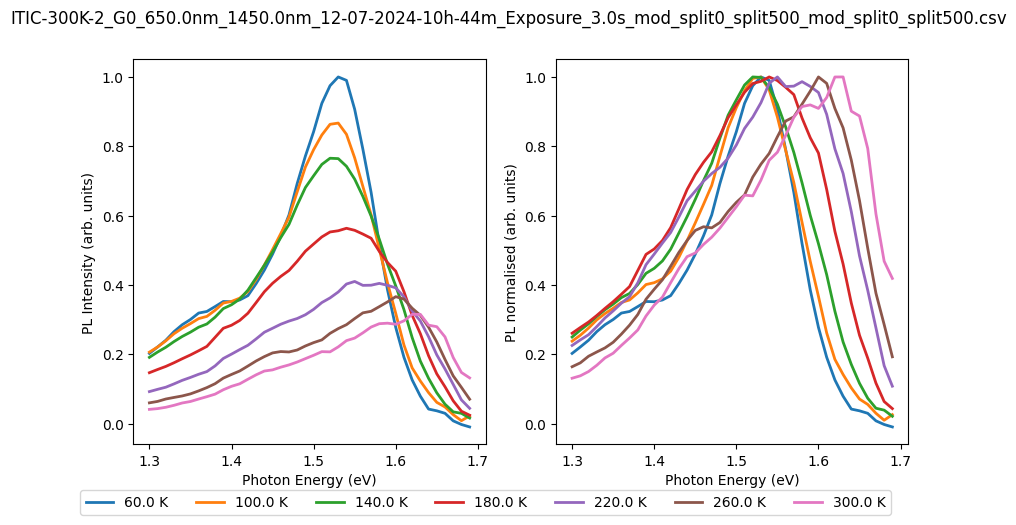

In [17]:
# change the wavelength range and plot the data
csv_names = Exp_data_utils.change_wavelength_range(
    csv_name,
    hws_limits=[1.3, 1.7],
    step=0.01,
    temperature_split=[],
)
for xsc_name in csv_names:
    Exp_data, temperature_list, hws = Exp_data_utils.read_data(xsc_name)
    fig, ax = Exp_data_utils.plot_pl_data(
        Exp_data, temperature_list, hws, title=xsc_name.name.split("/")[-1]
    )
    print(xsc_name)

In [18]:
# additional _exp data
max_abs_pos_exp = 1.77

temperature_lifetimes_exp = {
    "300": 3.2e-10,
    "260": 4.1e-10,
    "220": 5.1e-10,
    "180": 7.2e-10,
    "140": 8.9e-10,
    "100": 1.1e-09,
    "60": 1.1e-09,
}

# Define the error in the experimental data

(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    noise_sigma,
) = (5, 10, 0.005, 0.05, 0.001)
error_in_max_abs_pos = 0.01
relative_error_lifetime: 0.05

# Define the model parameters

fixed_parameters_dict = {
    "EX": {"numbrstates": 20, "disorder_ext": 0.1},
    "CT": {"off": 1},
    "D": {},
}
params_to_fit_init = {
    "EX": {"E": 1.7, "sigma": 0.04, "Li": 7.8e-2, "Lo": 0.11, "hO": 0.159},
    "CT": {},
    "D": {},
}
min_bounds = {
    "EX": {"E": 1.5, "sigma": 0.001, "Li": 0.03, "Lo": 0.03, "hO": 0.1},
    "CT": {},
    "D": {},
}
max_bounds = {
    "EX": {"E": 1.9, "sigma": 0.1, "Li": 0.2, "Lo": 0.2, "hO": 0.2},
    "CT": {},
    "D": {},
}

# save the model config
for _csv_name in csv_names:
    model_config, test_id = config_utils.save_model_config(
        csv_name_pl=_csv_name,
        Temp_std_err=Temp_std_err,
        hws_std_err=hws_std_err,
        relative_intensity_std_error_pl=relative_intensity_std_error_pl,
        temperature_list_pl=temperature_list,
        hws_pl=hws,
        noise_sigma=noise_sigma,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit_init=params_to_fit_init,
        min_bounds=min_bounds,
        max_bounds=max_bounds,
        num_iteration_max_likelihood=5,
        coeff_spread=0.5,
        nsteps=10000,
        num_coords=32,
        database_folder="fit_experimental_emcee_pl/fit_data_base/sensitivity/",
        data_folder="fit_experimental_emcee_pl/fit_data/sensitivity/",
    )

size of hw is (40,)
size of temperature_list is (7,)


## load model config and check 

In [25]:
# get test_ids in the database
database_path = "fit_experimental_emcee_pl/fit_data_base/sensitivity/"
model_config_files = Path(database_path).glob("*.json")
test_id_list = []
string_to_find = "ITIC"
for id, model_config_file in enumerate(model_config_files):
    test_id = model_config_file.name.replace(".json", "")
    test_id_list.append(test_id)
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=database_path
    )
    if string_to_find in model_config_save["csv_name_pl"]:
        print(id, model_config_file)
        print(model_config_save["csv_name_pl"])
        print(model_config_save["fixed_parameters_dict"])

0 fit_experimental_emcee_pl/fit_data_base/sensitivity/b5b02e74-1c42-431c-8c46-f1291fc70bf2.json
/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv
{'EX': {'numbrstates': 20, 'disorder_ext': 0.1}, 'CT': {'off': 1}, 'D': {}}


In [29]:
# importlib.reload(config_utils)
test_id = test_id_list[0]
model_config, model_config_save = config_utils.load_model_config(
    test_id, database_folder=database_path
)
fixed_parameters_dict, params_to_fit, min_bound, max_bound = (
    config_utils.get_dict_params(model_config_save)
)
csv_name = Path(model_config_save["csv_name_pl"])
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
print(model_config_save["csv_name_pl"].split("/")[-1])
print(model_config_save["fixed_parameters_dict"])

ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv
{'EX': {'numbrstates': 20, 'disorder_ext': 0.1}, 'CT': {'off': 1}, 'D': {}}


shape of mean value plot is (40, 7)


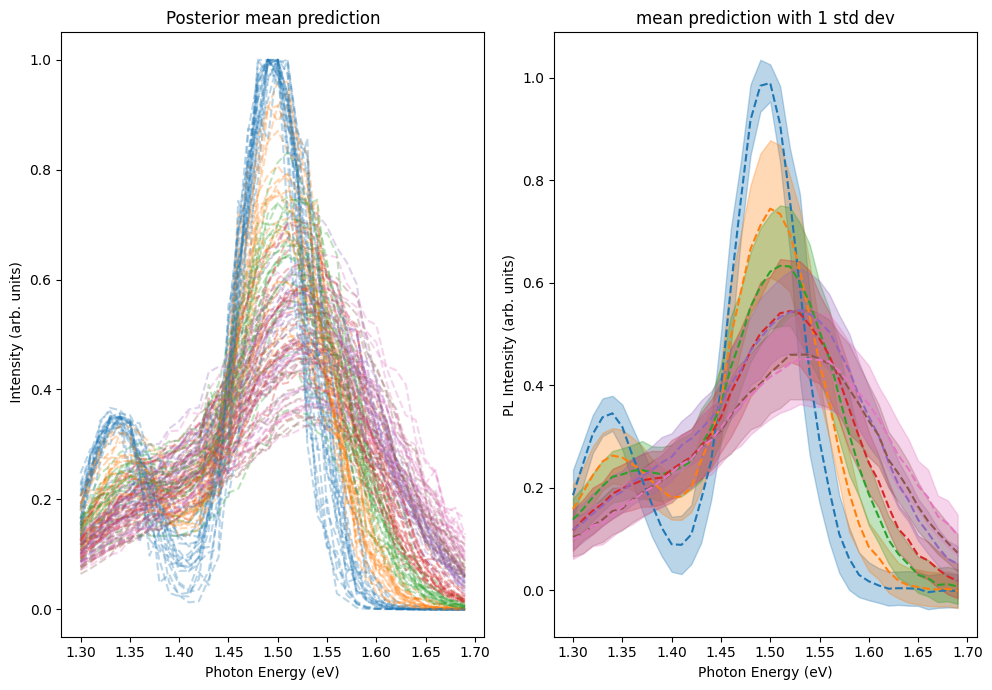

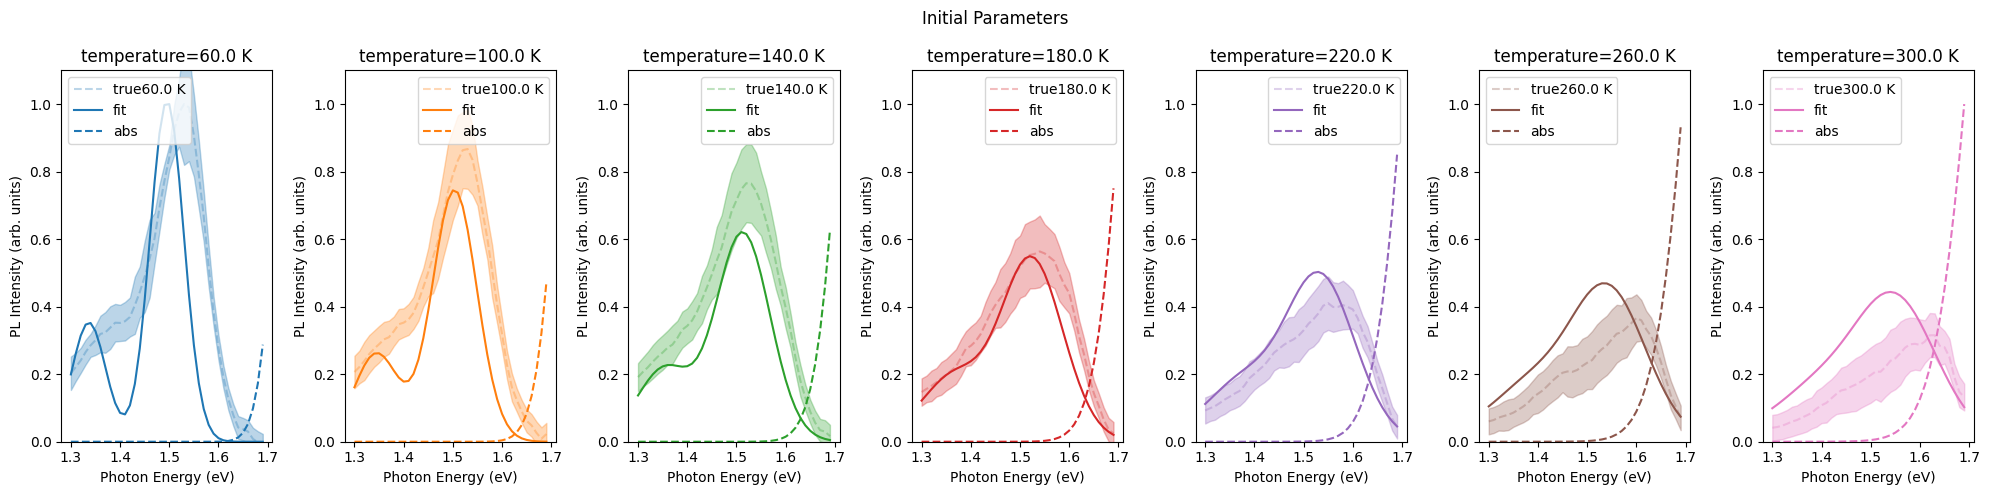

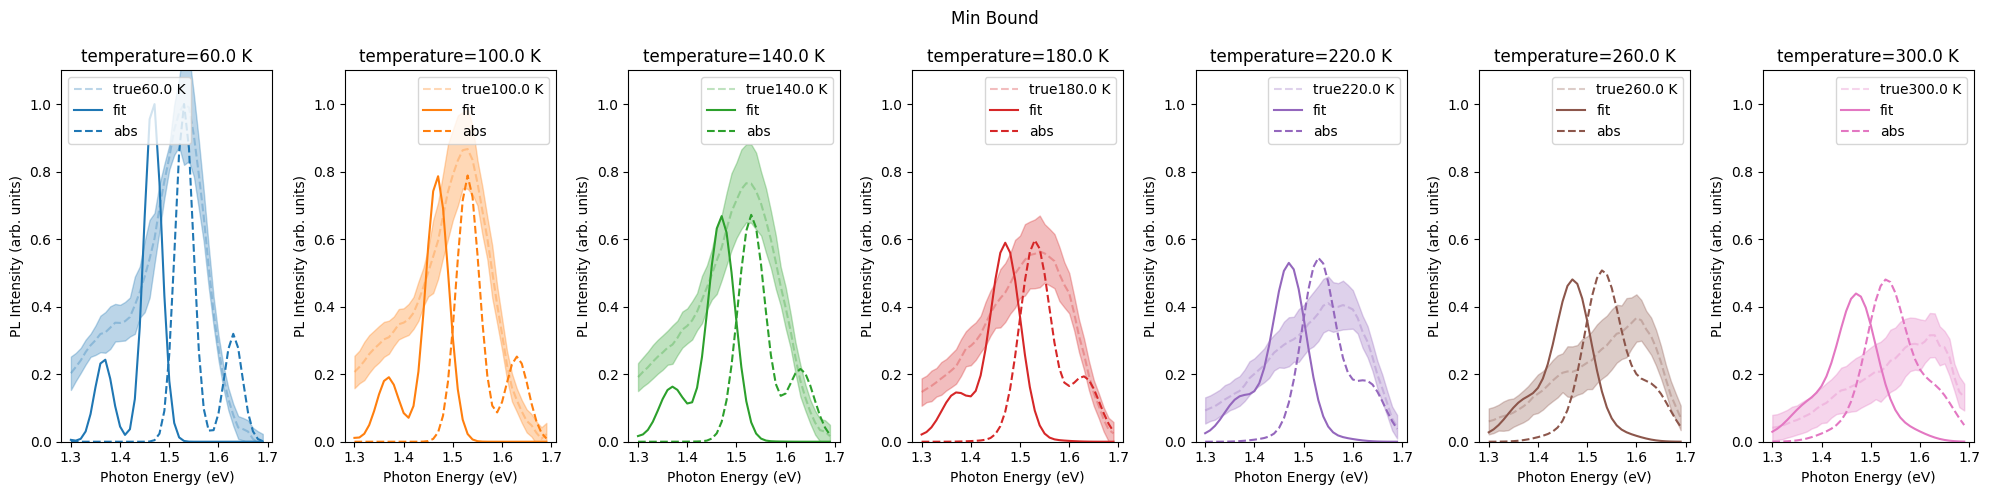

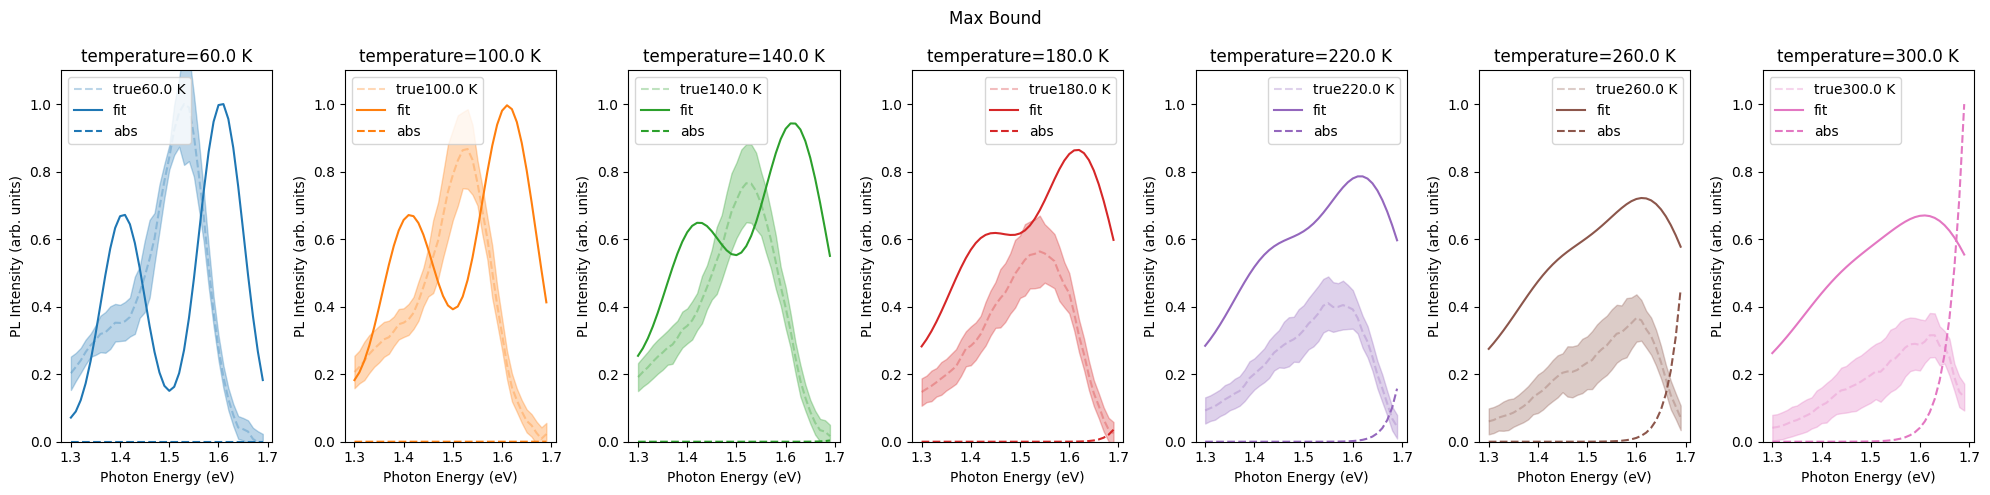

In [30]:
# plot the results with initial parameters
# and the maximum and minumum bounds
import importlib

from pl_temp_fit import fit_pl_utils

importlib.reload(fit_pl_utils)

fit_pl_utils.plot_fit_limits(model_config, model_config_save)

In [28]:
# modify the bounds
import importlib

importlib.reload(config_utils)

(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    sigma,
) = (5, 10, 0.005, 0.05, 0.001)
params_to_fit_init = {
    "EX": {
        "E": 1.37,
        "sigma": 0.01,
        "Li": 7.8e-2,
        "Lo": 0.11,
        "hO": 0.159,
        "disorder_ext": 0.1,
    },
    "CT": {},
    "D": {},
}
min_bounds = {
    "EX": {
        "E": 1.2,
        "sigma": 0.001,
        "Li": 0.03,
        "Lo": 0.03,
        "hO": 0.1,
        "disorder_ext": 0.1,
    },
    "CT": {},
    "D": {},
}
max_bounds = {
    "EX": {
        "E": 1.6,
        "sigma": 0.1,
        "Li": 0.2,
        "Lo": 0.2,
        "hO": 0.2,
        "disorder_ext": 0.1,
    },
    "CT": {},
    "D": {},
}
# save the model config
model_config, test_id = config_utils.save_model_config(
    csv_name_pl=csv_name,
    Temp_std_err=Temp_std_err,
    hws_std_err=hws_std_err,
    relative_intensity_std_error_pl=relative_intensity_std_error_pl,
    temperature_list_pl=temperature_list,
    hws_pl=hws,
    sigma=sigma,
    fixed_parameters_dict=fixed_parameters_dict,
    params_to_fit_init=params_to_fit_init,
    min_bounds=min_bounds,
    max_bounds=max_bounds,
    num_iteration_max_likelihood=5,
    coeff_spread=0.5,
    nsteps=10000,
    num_coords=32,
    database_folder="fit_experimental_emcee_pl/fit_data_base/",
    data_folder="fit_experimental_emcee_pl/fit_data/",
    test_id=test_id,
)

size of hw is (50,)
size of temperature_list is (7,)


In [12]:
csv_name

PosixPath('/media/mohammed/Work/fit_pl_database_Hanbo/cryostat/60-300K/Y6DIB-1mat-300K_G0_700.0nm_1500.0nm_21-06-2024-17h-49m_Exposure_3.0s_mod_split0_split500.csv')